In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy.linalg import svd
from matplotlib.pyplot import figure

In [2]:
class PCA:
    def __init__(self, numberOfComponents):
        self.n_components = numberOfComponents
        self.imgArr = np.array([])
        self.ResultImage = np.array([])
    
    def ImageFit(self, image):
        # converting image into numpy array
        imggray = image.convert("LA")
        self.imgArr = np.array(list(imggray.getdata(band=0)), float)
        self.imgArr.shape = (imggray.size[1], imggray.size[0])
        # computing mean
        mu = np.mean(self.imgArr, axis=0) 
        # number of rows
        m = self.imgArr.shape[0]
        # zero-center data (remove mean)
        # Xn = imgmat - imgmat.mean(axis=0)             
        # compute covariance matrix
        Sigma = (self.imgArr.T @ self.imgArr) / m
        # Compute SVD
        U, S, VT = self.SVD(Sigma)
        # project data
        X_proj = self.imgArr @ U[:, :self.n_components]
        # recovering data
        self.ResultImage = X_proj @ U[:, :self.n_components].T
    
    def SVD(self, Arr):
        U, S, VT = svd(Arr)
        return U, S, VT
    
    def ImageShow(self):
        plt.axis('off')
        plt.title(f"PCs # {self.n_components}")
        plt.style.use('classic')
        plt.imshow(self.ResultImage, cmap='gray')
    
    def ShowMultiImage(self, Arr, img):
        figure(figsize=(15, 12), dpi=200)
        for idx, m in enumerate(Arr):
            pca = PCA(m)
            pca.ImageFit(img)
            plt.subplot(1, len(Arr), idx + 1)
            plt.imshow(pca.ResultImage, cmap="gray")
            plt.axis('off')
            plt.title(f"PCs # {Arr[idx]}")
            
    def Accurancy(self,acc):
        m, n = self.imgArr.shape
        Xn = self.imgArr - self.imgArr.mean(axis=0)
        Sigma = (self.imgArr.T @ self.imgArr) / m
        U, S, V = svd(Sigma)

        for k in range(1, n + 1):
            total_var = np.sum(S[:k]) / np.sum(S)
            print("k = {:d}, explained variance = {:.3f}".format(k, total_var))
            if total_var >= acc: break
        

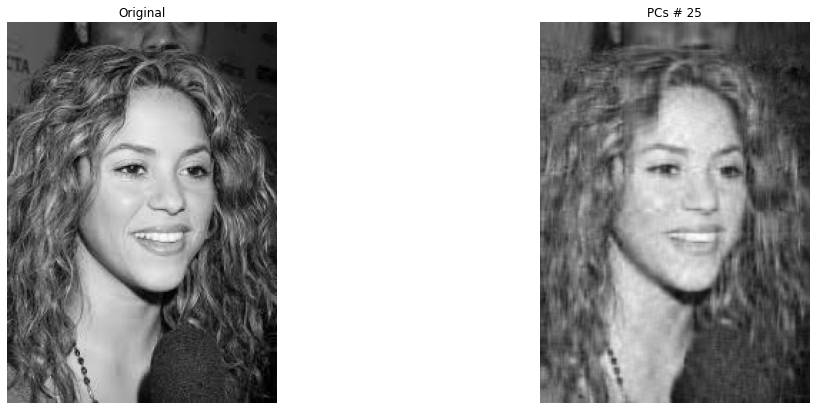

In [3]:
# reading the image
img = Image.open('images.jpg')
pca = PCA(25)
pca.ImageFit(img)

fig = plt.figure(figsize=(35, 7))
fig.add_subplot(1, 2, 1)

imggray = img.convert("LA")
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
plt.imshow(imgmat, cmap='gray')
plt.title('Original')
fig.patch.set_facecolor('white')
plt.axis('off')

fig.add_subplot(1, 1, 1)
pca.ImageShow()

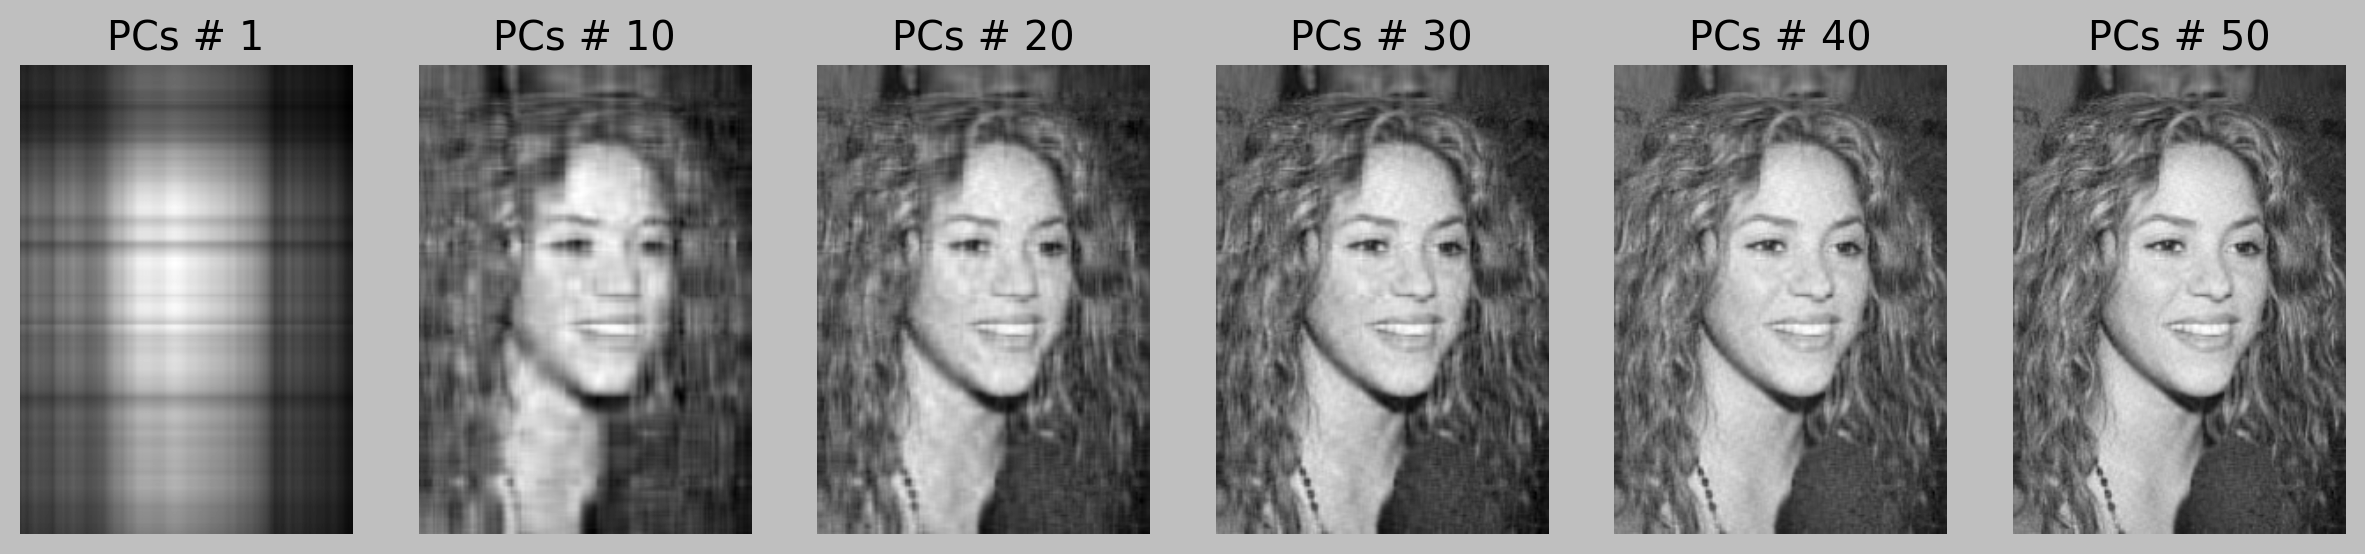

In [4]:
pca.ShowMultiImage([1, 10, 20, 30, 40, 50], img)

In [5]:
img = Image.open('images.jpg')
pca = PCA(25)
pca.ImageFit(img)
pca.Accurancy(0.95)

k = 1, explained variance = 0.889
k = 2, explained variance = 0.935
k = 3, explained variance = 0.945
k = 4, explained variance = 0.953
